<a href="https://colab.research.google.com/github/Aditya9015/demo/blob/main/adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fitting 5 folds for each of 9 candidates, totalling 45 fits

AdaBoost Evaluation Metrics:
      Metric     Score
0   Accuracy   95.9500
1  Precision  100.0000
2     Recall   92.1100
3   F1 Score   95.8900
4        MCC    0.9221


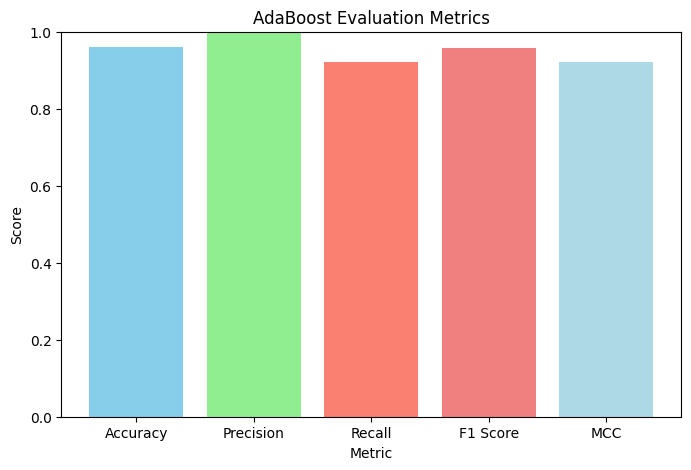

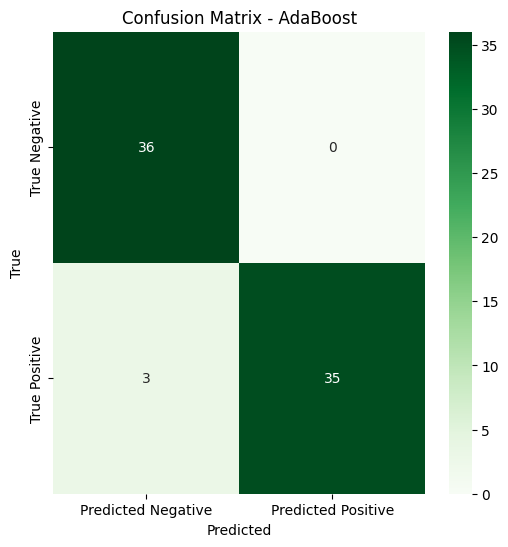

In [2]:
!pip install requests
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
# Import the requests module
import requests # This line was added to import the requests module.
url_string = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'


# Downloading Content From URL & Storing Into Local File
url_content = requests.get(url_string).content
with open('data.csv', 'wb') as data_file:
  data_file.write(url_content)


# Reading Data Into Pandas Dataframe
df = pd.read_csv('data.csv')

X = df.drop(['name', 'status'], axis=1)  # 'name' is an identifier, drop it
y = df['status']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Apply SMOTE first
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Apply PCA after SMOTE
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_resampled)

# 4. Model Training with GridSearchCV for SVM
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Hyperparameter Grid for AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# GridSearchCV for AdaBoost
grid_ada = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid_ada, cv=5, scoring='f1_macro', verbose=1)
grid_ada.fit(X_train, y_train)

# Best model
best_ada = grid_ada.best_estimator_

# Predictions
y_pred_ada = best_ada.predict(X_test)

# Evaluation Metrics
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada, average='binary')
recall_ada = recall_score(y_test, y_pred_ada, average='binary')
f1_ada = f1_score(y_test, y_pred_ada, average='binary')
mcc_ada = matthews_corrcoef(y_test, y_pred_ada)

# Confusion Matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)

# Display results in table
results_ada = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'Score': [round(accuracy_ada * 100, 2), round(precision_ada * 100, 2), round(recall_ada * 100, 2), round(f1_ada * 100, 2), round(mcc_ada, 4)]
})

print("\nAdaBoost Evaluation Metrics:")
print(results_ada)

# Bar chart
metrics_ada = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']
scores_ada = [accuracy_ada, precision_ada, recall_ada, f1_ada, mcc_ada]

plt.figure(figsize=(8, 5))
plt.bar(metrics_ada, scores_ada, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue'])
plt.title('AdaBoost Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Confusion Matrix Plot
plt.figure(figsize=(6, 6))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Greens', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - AdaBoost')
plt.show()
